# Prepare entering to the Titanic Kaggle Competition !

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib as plt #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(plt.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.1.0
NumPy version: 1.16.4
SciPy version: 1.4.1
IPython version: 7.6.1
scikit-learn version: 0.21.2
-------------------------


In [56]:
#Show all installed versions 
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 5.0.1
pip: 20.0.2
setuptools: 41.0.1
Cython: 0.29.12
numpy: 1.16.4
scipy: 1.4.1
pyarrow: None
xarray: None
IPython: 7.6.1
sphinx: 2.1.2
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: 1.2.1
tables: 3.5.2
numexpr: 2.6.9
feather: None
matplotlib: 3.1.0
openpyxl: 2.6.2
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.8
lxml.etree: 4.3.4
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.5
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


**Set a working directory**

In [57]:
import os
os.chdir('C:/Users/Fouad/Desktop/Kaggle/Titanic')
print("Current working directory path is \"{}\"".format(os.getcwd()))

Current working directory path is "C:\Users\Fouad\Desktop\Kaggle\Titanic"


####  Import and display datatypes of the train and test set. The variables are the same except the target variable "Survived" which is removed from the test set.

In [58]:
df_train = pd.read_csv("./train.csv")
#Display columns datatype from a dataframe
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
print("The train set contains {} rows and {} columns".format(*df_train.shape))

The train set contains 891 rows and 12 columns


In [60]:
df_test = pd.read_csv("./test.csv")
#Display columns datatype from a dataframe
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [61]:
print("The test set contains {} rows and {} columns".format(*df_test.shape))

The test set contains 418 rows and 11 columns


In [62]:
#Merge the train and test set
#Concatenate the 2 dataframes
frames = [df_train, df_test]
titanic = pd.concat(frames)

In [63]:
#Check if merge is fine
print("The Titanic dataset contains {} rows and {} columns".format(*titanic.shape))
titanic.tail(1)
#titanic.head(1)

The Titanic dataset contains 1309 rows and 12 columns


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [64]:
#Select columns by datatype for ex select only numeric columns
df_train.select_dtypes(include="number").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [65]:
#We can also exclude a datatype (numeric columns for example)
titanic.select_dtypes(exclude="number").head()

,Cabin,Embarked,Name,Sex,Ticket
0,NaN,S,"Braund, Mr. Owen Harris",male,A/5 21171
1,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,NaN,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,NaN,S,"Allen, Mr. William Henry",male,373450


In [66]:
#Number of missing values by columns
print(titanic.isnull().sum(axis=0)*100/len(titanic))

Age            20.091673
Cabin          77.463713
Embarked        0.152788
Fare            0.076394
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Survived       31.932773
Ticket          0.000000
dtype: float64


For the variable "Survived" the missing data rate is normal as the test set does not contain information about the "Survived" variable.

In [84]:
#Imputation by mean for 'Fare' and by mode for 'Embarked'
titanic['Embarked']=titanic['Embarked'].fillna(value=titanic['Embarked'].iloc[0])
titanic['Fare']=titanic['Fare'].fillna(value=titanic['Fare'].mean())

print(titanic.head())

  Embarked     Fare  Parch  Pclass     Sex  SibSp  Survived  FamilySize
0        S   7.2500      0       3    male      1       0.0           2
1        C  71.2833      0       1  female      1       1.0           2
2        S   7.9250      0       3  female      0       1.0           1
3        S  53.1000      0       1  female      1       1.0           2
4        S   8.0500      0       3    male      0       0.0           1


We remove the **Age** and the **Cabin** variables as they contain more than **20% of missing data**, we remove also the **Name, Ticket** and the **PassengerId** which should not be relevant.

In [85]:
#Number of missing values by individuals
print(titanic.isnull().sum(axis=1).sort_values(ascending = False).head(5))

417    1
103    1
131    1
132    1
133    1
dtype: int64


No individual has too many missing values (3 maximum), so we keep all individuals.

Drop Age, Cabin, Name, PassengerId and Ticket columns from the titanic dataset


In [86]:
columns = ['Age','Cabin', 'Name','PassengerId','Ticket']

titanic = titanic.drop(columns, axis=1)
print(titanic.head(1))

  Embarked  Fare  Parch  Pclass   Sex  SibSp  Survived  FamilySize
0        S  7.25      0       3  male      1       0.0           2


Create a column family number based on Siblings and Parch (+1 to count the person + his family)

In [70]:
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1
print(titanic.head(5))

  Embarked     Fare  Parch  Pclass     Sex  SibSp  Survived  FamilySize
0        S   7.2500      0       3    male      1       0.0           2
1        C  71.2833      0       1  female      1       1.0           2
2        S   7.9250      0       3  female      0       1.0           1
3        S  53.1000      0       1  female      1       1.0           2
4        S   8.0500      0       3    male      0       0.0           1


In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Embarked      1309 non-null object
Fare          1309 non-null float64
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      891 non-null float64
FamilySize    1309 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 132.0+ KB


In [72]:
print("The cleaned titanic dataset has {} rows and {} columns".format(*titanic.shape))

The cleaned titanic dataset has 1309 rows and 8 columns


## Explanatory Data Analysis

In [73]:
titanic.describe()

,Fare,Parch,Pclass,SibSp,Survived,FamilySize
count,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,33.295479,0.385027,2.294882,0.498854,0.383838,1.883881
std,51.738879,0.865560,0.837836,1.041658,0.486592,1.583639
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,7.895800,0.000000,2.000000,0.000000,0.000000,1.000000
50%,14.454200,0.000000,3.000000,0.000000,0.000000,1.000000
75%,31.275000,0.000000,3.000000,1.000000,1.000000,2.000000
max,512.329200,9.000000,3.000000,8.000000,1.000000,11.000000


We verified that the PassengerId is unique in the dataset

In [74]:
df_train.PassengerId.nunique()

891

In [75]:
df_test.PassengerId.nunique()

418

In [76]:
#Proportion of surviving people 342 persons survived in the train dataset
df_train.groupby(by="Survived")["PassengerId"].agg("count")

Survived
0    549
1    342
Name: PassengerId, dtype: int64

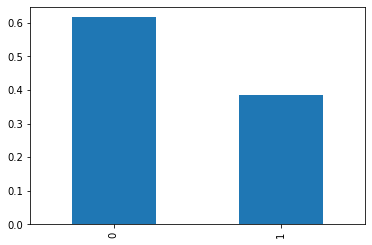

In [77]:
#Or in frequency so around 40% of surviving people, 60% doesn't survived
(df_train['Survived'].value_counts()/len(df_train)).plot.bar()

In [78]:
#Select numeric columns in the merged dataset
titanic_num = titanic.select_dtypes(include="number")

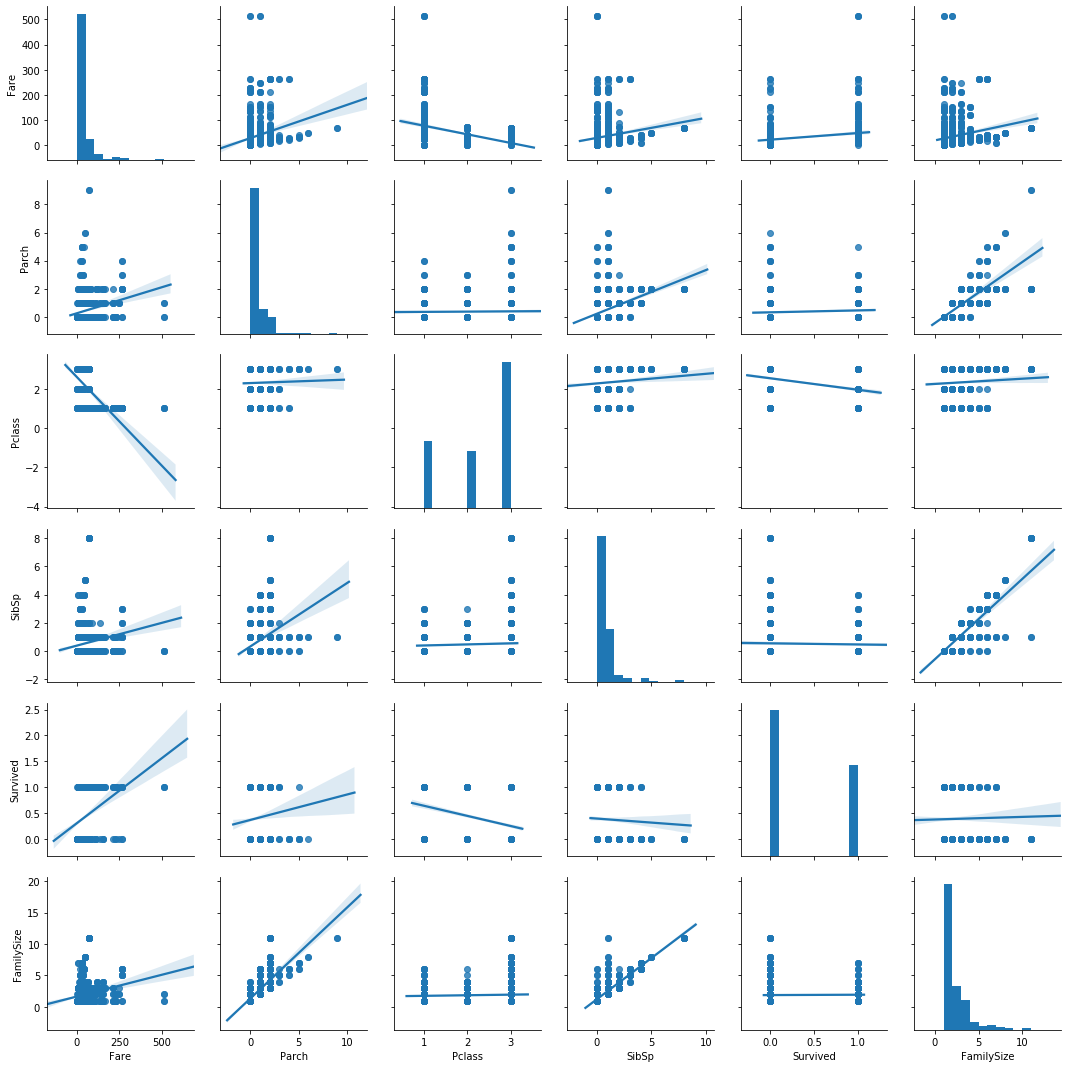

In [79]:
#Histograms of variables in the dataset
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(titanic_num, kind="reg")

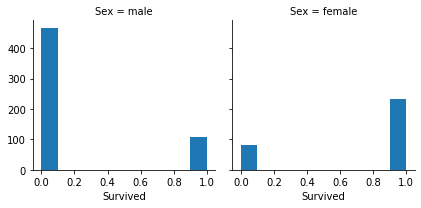

In [80]:
#Check for the training set distribution of Survival by Sex
g = sns.FacetGrid(df_train, col="Sex")
g.map(plt.hist, "Survived");

Women seems to survive more than men let's check that with some tables. Let's have a look and check the count of persons who survived (or died) by Sex (Female or Male).

In [88]:
survived_class_sex = pd.crosstab(index=df_train["Survived"], 
                            columns=df_train["Sex"],
                             margins=True) 

survived_class_sex.columns = ["Female","Male","Row total"]
survived_class_sex.index= ["Died","Survived","Col total"]

survived_class_sex

,Female,Male,Row total
Died,81,468,549
Survived,233,109,342
Col total,314,577,891


In [90]:
table1 = round((survived_class_sex*100)/survived_class_sex.ix["Col total"],2)
table1

,Female,Male,Row total
Died,25.8,81.11,61.62
Survived,74.2,18.89,38.38
Col total,100.0,100.00,100.00


In [ ]:
print("There were {}% of women who survived, whereas only {}% of men survived".format(table1['Female']['survived'], table1['Male']['survived']))

In [91]:
survived_class_pclass = pd.crosstab(index=df_train["Survived"], 
                            columns=df_train["Pclass"],
                             margins=True) 

survived_class_pclass.columns = ["Pclass = 1","Pclass = 2","Pclass = 3","Row total"]
survived_class_pclass.index= ["Died","Survived","Col total"]

survived_class_pclass


,Pclass = 1,Pclass = 2,Pclass = 3,Row total
Died,80,97,372,549
Survived,136,87,119,342
Col total,216,184,491,891


In [92]:
table2 = round((survived_class_pclass*100)/survived_class_pclass.ix["Col total"],1)
table2

,Pclass = 1,Pclass = 2,Pclass = 3,Row total
Died,37.0,52.7,75.8,61.6
Survived,63.0,47.3,24.2,38.4
Col total,100.0,100.0,100.0,100.0


In [95]:
print("There were {}% of people from 1st class who survived, {}% of 2nd class survived, and only {}% of 3rd class".format(table2['Pclass = 1']['Survived'], table2['Pclass = 2']['Survived'],table2['Pclass = 3']['Survived']))

There were 63.0% of people from 1st class who survived, 47.3% of 2nd class survived, and only 24.2% of 3rd class


In [96]:
survived_class_fare = pd.crosstab(index=df_train["Survived"], 
                            columns=df_train["Fare"],
                             margins=True) 

survived_class_sex.columns = ["Female","Male","Row total"]
survived_class_sex.index= ["Died","Survived","Col total"]

survived_class_sex

,Female,Male,Row total
Died,81,468,549
Survived,233,109,342
Col total,314,577,891


In [ ]:
#Impute age variable first display age distribution
#df_train.hist(column='Age')
#df_train['Age'].count_values()


#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer


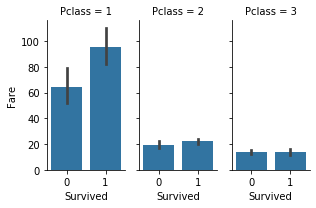

In [97]:
#Let's check the variables Fare and Survived !
g = sns.FacetGrid(df_train, col="Pclass", height=3, aspect=.5)
g.map(sns.barplot, "Survived", "Fare")

In [98]:
#Check the fare paid by the persons and the relation with the survival
df_train_ = df_train.groupby(by=["Survived","Pclass"])["Fare"].agg("mean")
print(df_train_)

Survived  Pclass
0         1         64.684008
          2         19.412328
          3         13.669364
1         1         95.608029
          2         22.055700
          3         13.694887
Name: Fare, dtype: float64


The more the paid fare were high, the more people were likely to survive ! We also find this link within the 1st class !

In [99]:
print(titanic.columns)

Index(['Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived',
       'FamilySize'],
      dtype='object')


AxesSubplot(0.125,0.125;0.62x0.755)


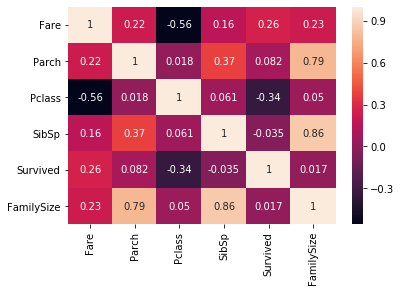

In [100]:
import seaborn as sns

corr_mat = titanic.corr()
heat_titanic = sns.heatmap(corr_mat,annot = True)
print(heat_titanic)

The heatmap plot shows that some variables seems highly correlated like **SibSp**, **Parch** and **FamilySize** which sounds logical as they all describe the composition of the family (and **FamilySize** has been made from the 2 previous variables). The variables with the highest correlation to the target variable were **Fare** and **Pclass** as we suspected from the previous graphs. We may consider some variable selection of feature importance, we will see it later.

## Modelling

Import necessary librairies for modelling

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
#X = titanic.loc[:, titanic.columns != 'Survived']
#y = titanic.loc[:, titanic.columns == 'Survived']
#y = y.values.reshape(-1,1)
#print(X.shape)
#print(y.shape)

Pclass, Embarked, Parch, SibSp, FamilySize, Sex are converted to dummy variables


In [101]:
#Pclass, Embarked, Parch, SibSp, FamilySize, Sex to dummy variables
col_to_dummy = ['Pclass', 'Embarked', 'Parch', 'SibSp', 'FamilySize', 'Sex']

titanic = pd.get_dummies(titanic, columns=col_to_dummy)

### Split dataset into train and test

In [102]:
def recover_train_test_target():
    global titanic
    
    targets = pd.read_csv('./train.csv', usecols=['Survived'])['Survived'].values
    train = titanic.iloc[:891]
    test = titanic.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()
X_train = train.loc[:, train.columns != 'Survived']
y_train = train.iloc[:, train.columns=="Survived"]
y_train = y_train.values.reshape(-1,1)
X_test = test.loc[:, test.columns != 'Survived']
y_test = test.iloc[:, test.columns == "Survived"]
y_test = y_test.values.reshape(-1,1)

So we recover train set (with Survived variable inside) and the test set with the missing Survived variable.

In [104]:
clf = DecisionTreeClassifier(random_state=8)
clf = clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [208]:
def compute_score(clf, X_train, y_train, scoring='accuracy'):
    xval = cross_val_score(clf, X_train, y_train, cv = 5, scoring=scoring)
    return np.mean(xval)
logreg = LogisticRegression()
DT = DecisionTreeClassifier(random_state=8)
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
gboost = GradientBoostingClassifier()
xgboost = XGBClassifier()
models = [logreg, DT, logreg_cv, rf, gboost,xgboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(model, X_train, y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.645
****
Cross-validation of : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
CV score = 0.885
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.647
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8940000000000001
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.892
****
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.8950000000000001
****


So we finally choose Gradient Boosting which predict the survival variable with 80% of accuracy !
However we notice that Logistic Regression gives also a quite good result ~79.6% and has the advantage to be more interpretable. 

In [214]:
model = GradientBoostingClassifier(validation_fraction=0.1)
clf = model.fit(X_train, y_train)
clf.feature_importances_  

modelf = SelectFromModel(clf, prefit=True)
X_new = modelf.transform(X_train)

score = compute_score(model, X_new, y_train, scoring='accuracy')
print("GBC score is {}".format(score))

GBC score is 0.9109999999999999


In [201]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X_train, y_train = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [204]:
####
rf = RandomForestClassifier(max_features='auto', n_estimators= 200)
model_rf = rf.fit(X_train,y_train)
score = compute_score(model_rf, X_train, y_train, scoring='accuracy')
print(score)

0.9029999999999999


In [154]:
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model_x = XGBClassifier(validation_fraction=0.1)

clf_x = model_x.fit(X_train, y_train)

gsc = GridSearchCV(clf_x, params, n_jobs=1, cv=3)

In [155]:
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

In [156]:
print(best_params)

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}


In [157]:
model_xf = XGBClassifier(validation_fraction=0.1,colsample_bytree= 1.0, 
                                                gamma= 0.5, max_depth= 5,
                                     min_child_weight=5, subsample=1.0)


In [159]:
score_xgb = compute_score(model_xf, X_train, targets, scoring='accuracy')
print(score_xgb)

0.8036193868543972


In [ ]:
#titanic_without_sur = train.loc[:, train.columns != 'Survived']
#ind_with_surv = titanic_without_sur.columns

In [108]:
clf.feature_importances_

array([2.15547765e-01, 2.21384839e-02, 1.99609970e-04, 1.32142975e-01,
       4.51769661e-03, 4.32365521e-03, 1.58506928e-02, 1.72479854e-02,
       1.84100840e-03, 4.48826018e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.68541654e-04,
       1.43664811e-06, 1.61304387e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.44476072e-03, 6.41123859e-04, 3.24113589e-03,
       1.55270623e-02, 1.70272524e-02, 8.01710556e-03, 8.04220226e-03,
       1.33857439e-03, 1.89511485e-03, 4.29704455e-04, 1.09969107e-01,
       4.16085135e-01])

#### Plot the top 4 feature importance of the dataset

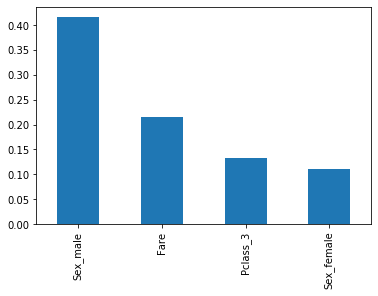

In [109]:
feat_importances = pd.Series(clf.feature_importances_, index=ind_with_surv)
feat_importances.nlargest(4).plot(kind='bar')

### Prepare submission to Kaggle

In [215]:
#X = titanic.loc[:, titanic.columns != 'Survived']

X_test = test.loc[:, test.columns != 'Survived']
features=X_test.columns
print("The number of features of the test set is {}".format(features.size))
predictions = clf.predict(test[features]) #replace later by clf (of gbc)
print("The size of the vector of predictions is {}".format(predictions.size))

The number of features of the test set is 33


ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 33 

In [ ]:
test_PassengerId = pd.DataFrame(df_test['PassengerId'])
predictions_df = pd.DataFrame(predictions)
titanic_submition = test_PassengerId.join(predictions_df, how="left")
titanic_submition.rename(columns={'PassengerId':'PassengerId',0:'Survived'}, inplace=True)
titanic_submition=titanic_submition.sort_values('PassengerId', axis=0, ascending=True)

In [ ]:
#Convert to integer the 2 variables
titanic_submition["PassengerId"] = titanic_submition["PassengerId"].astype(int)
titanic_submition["Survived"] = titanic_submition["Survived"].astype(int)

In [ ]:
#Replace 0 by empty 
#titanic_submition["Survived"] = titanic_submition.Survived.replace({0:""})

In [ ]:
print("The file to submit contains {} rows and {} columns.".format(*titanic_submition.shape))

The file is ok to be submited !

In [ ]:
titanic_submition.to_csv('titanic_submition.csv',index=False,header=True)

In [ ]:
#Bonus new package which gives a quick summary of a dataset 
import pandas_profiling
import pandas as pd
titanic = pd.read_csv("C:/Users/Fouad/Desktop/titanic.csv",sep='\t')

pandas_profiling.ProfileReport(titanic)